# Predicting the Relationship Status of the students

## Executive Summary

Given the data of the students, construct a model that will classify if the student is in a relationship or not. Exploratory data analysis was done and kNN classifier was constructed to be able to predict a student's relationship status. All of the features were used in the model.

From the csv file, we read the data provided by the students in the class.

In [27]:
msds = pd.read_csv('ACS-ML Data.csv')

## Data Description

A survey was conducted to generate the data below for the MSDS 2019 students. There were 46 columns in the file with headings as follows:

Col 1. Number of movies you watched from cinema in the last two weeks

Col 2. Number of movies you watched from home in the last two weeks

Col 3. Average Cups of coffee consumed per day

Col 4. Average amount of bills paid for mobile used

Col 5. Average number of posts in social media per week

Col 6. In  a relationship (Yes ,  No,  it’s complicated)

Col 7. How old are you?

Col 8. Male or female? (pls type M or F)

Col 9. What is your height in cm?

Col 10. What is your weight in kg?

Col 11. What is your waist size in inches?

Col 12. What is your favorite color?

Col 13. What is your favorite number, from 0 to 9?

Col 14. Are you predominantly right handed or left handed? (pls type R or L)

Col 15. What is your favorite car brand? Toyota, Honda, Hyundai, BMW, Mercedes, etc.

Col 16. How many cars have you owned in your life?

Col 17. What phone network do you use? Globe, Smart, Sun, etc.

Col 18. What phone brand do you use? Samsung, Apple, Vivo, Huawei, Sony, etc.

Col 19. How many years do you use your phone before replacing it?

Col 20. How many cities have you lived in? (Must have lived more than 1 year)

Col 21. How many siblings are you in the family? (not counting half siblings)

Col 22. What is your favorite sport? Basketball, football, volleyball, tennis, etc.

Col 23. What browser do you prefer? Chrome, IE, Firefox, Safari

Col 24. How many functioning shoes do you own currently?

Col 25. What is your blood type? O A B AB

Col 26. How many countries have you visited?

Col 27. How many provinces in the Philippines have you visited?

Col 28. Where is your ideal city to live in?

Col 29. How many times in a month do you go to the mall?

Col 30. What is your favorite mall? SM, Ayala, Robinsons, Rustan’s, etc.

Col 31. What is your favorite fastfood place?

Col 32. What is your favorite meat to eat? Chicken, pork, beef, fish, etc.

Col 33. How many times in a month do you eat in Jollibee?

Col 34. How many times in a week do you cook at home?

Col 35. How many times in a month do you go out with your s.o.?

Col 36. How many movies do you see inside a theater in a year?

Col 37. How many years in your life have you been a smoker?

Col 38. How many beers can you drink in one night?

Col 39. How many pizzas can you eat in one sitting?

Col 40. How many times do you buy coffee in a week?

Col 41. How many Facebook friends do you have? (In hundreds, e.g. 1100)

Col 42. How many partners have you had?

Col 43. What kind of songs do you usually listen to? Pop, hip-hop, R&B, alternative, rock, classical, country, jazz, etc.

Col 44. How many songs do you know the lyrics to?

Col 45. What do you think your grade in this class will be?

Col 46. What age do you think you will live to?

## Data Processing

We first take a look at the data to see if it needs some cleaning.

In [119]:
msds.head()

,Number of movies you watched from cinema in the last two weeks,Number of movies you watched from home in the last two weeks,Average Cups of coffee consumed per day,Average amount of bills paid for mobile used,Average number of posts in social media per week,"In a relationship (Yes , No, it’s complicated)",How old are you?,Male or female? (pls type M or F),What is your height in cm?,What is your weight in kg?,...,How many years in your life have you been a smoker?,How many beers can you drink in one night?,How many pizzas can you eat in one sitting?,How many times do you buy coffee in a week?,"How many Facebook friends do you have? (In hundreds, e.g. 1100)",How many partners have you had?,"What kind of songs do you usually listen to? Pop, hip-hop, R&B, alternative, rock, classical, country, jazz, etc.",How many songs do you know the lyrics to?,What do you think your grade in this class will be?,What age do you think you will live to?
0,0.0,0.0,0.0,1799,1.0,Yes,30.0,M,168,67,...,0,1,3,0.0,933.0,4.0,EDM,5,5,128.0
1,NaN,NaN,NaN,NaN,NaN,NaN,29.0,F,160,62,...,0,1,3 slices,6.0,700.0,0.0,"pop, jazz, rock, classical, R&B",30,4.5,90.0
2,0.0,0.0,0.0,800,0.0,Yes,33.0,M,177,150,...,0,6,4,0.0,800.0,5.0,Rock,10,5,82.0
3,NaN,NaN,NaN,NaN,NaN,NaN,28.0,M,167cm,80kg,...,0,15,4,10.0,1100.0,1.0,"classical, pop, alternative, country",20,5.0,68.0
4,1.0,1.0,3.0,300.00,5.0,No,32.0,M,177,90,...,0,0,6,6.0,1000.0,0.0,"jazz, R&B, classical, country, soul",10,5,70.0


### Cleaning the Data

The data was generated on different sessions, some parts of the survey are then left unanswered.

Data Cleaning was done using Microsoft Excel. This can be done because this is a relatively small dataset. There are few lines with more than one incomplete data. In the cleaning of this dataset the rows were then removed for those cases especially if the feature that we are predicting is missing or there are substantial features left unanswered.

The discrepancies were changed, for example, in terms of numerical values, or corrected the spelling, and so on. Answers deemed irrelevant for certain features were dropped.

The original data on relationship status consists majority of *Yes* and *No*, with only one *It's complicated*. For simplification, *It's complicated* was treated as In a relationship because the person has a significant other. There are also few data to be able to predict that case.

In [8]:
ml = pd.read_excel('Cleaned.xlsx', sheet_name='Sheet1')

We then isolated the column for relationship status.

In [9]:
df2 = pd.DataFrame(ml)
df2.iloc[:,5].head()

0    Yes
1    Yes
2     No
3    Yes
4     No
Name: In  a relationship (Yes ,  No,  it’s complicated), dtype: object

### Proportion Chance Criterion

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

Population per class:       0
Yes  20
No   16

1.25 * Proportion Chance Criterion: 63.27160493827161%


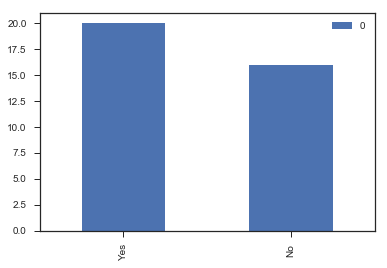

In [123]:
state_counts = Counter(df2.iloc[:,5])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

### Pairplot

Column names in this case were changed because some of them have lengthy names i.e., exact questions in the survey given.

We considered Col6. In  a relationship (Yes ,  No,  it’s complicated) as the Target. We then take a look at the pairplot and see if there is any relationship among the variables especially in a large dataset. 


Plots in this case were divided into three because of the number of features.

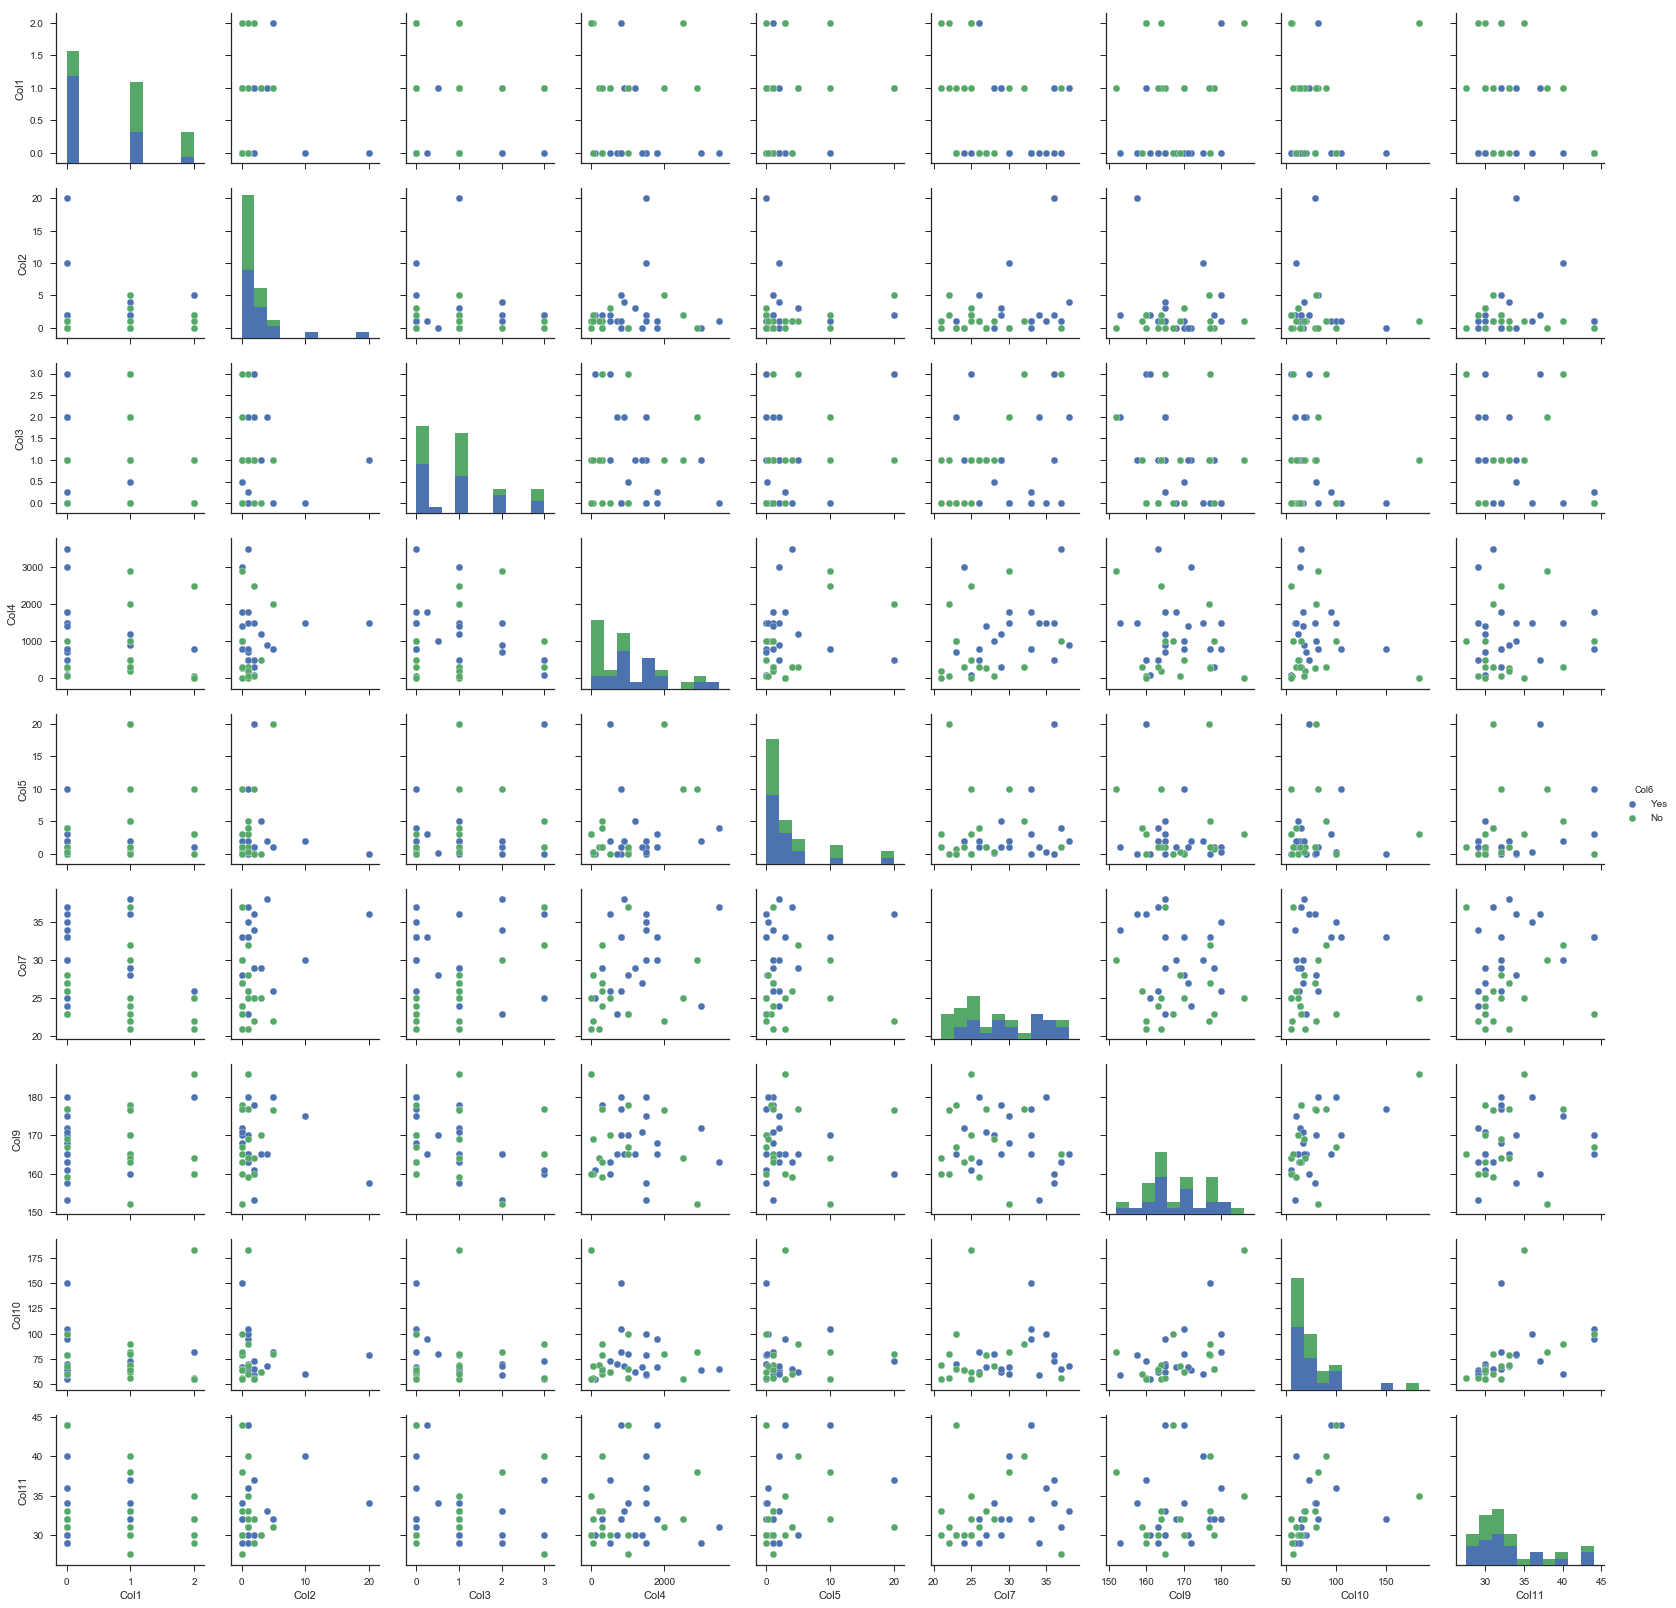

In [12]:
import seaborn as sns
sns.set(style="ticks")

df2 = pd.DataFrame(ml)
df2.columns = ['Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9',
               'Col10','Col11','Col12','Col13','Col14','Col15','Col16','Col17'
               ,'Col18','Col19','Col20','Col21','Col22','Col23','Col24','Col25'
               ,'Col26','Col27','Col28','Col29','Col30', 'Col31', 'Col32', 
               'Col33', 'Col34', 'Col35', 'Col36', 'Col37', 'Col38', 'Col39', 
               'Col40', 'Col41', 'Col42', 'Col43', 'Col44', 'Col45','Col46']

sns.pairplot(df2.iloc[:,:11], hue='Col6')

pass

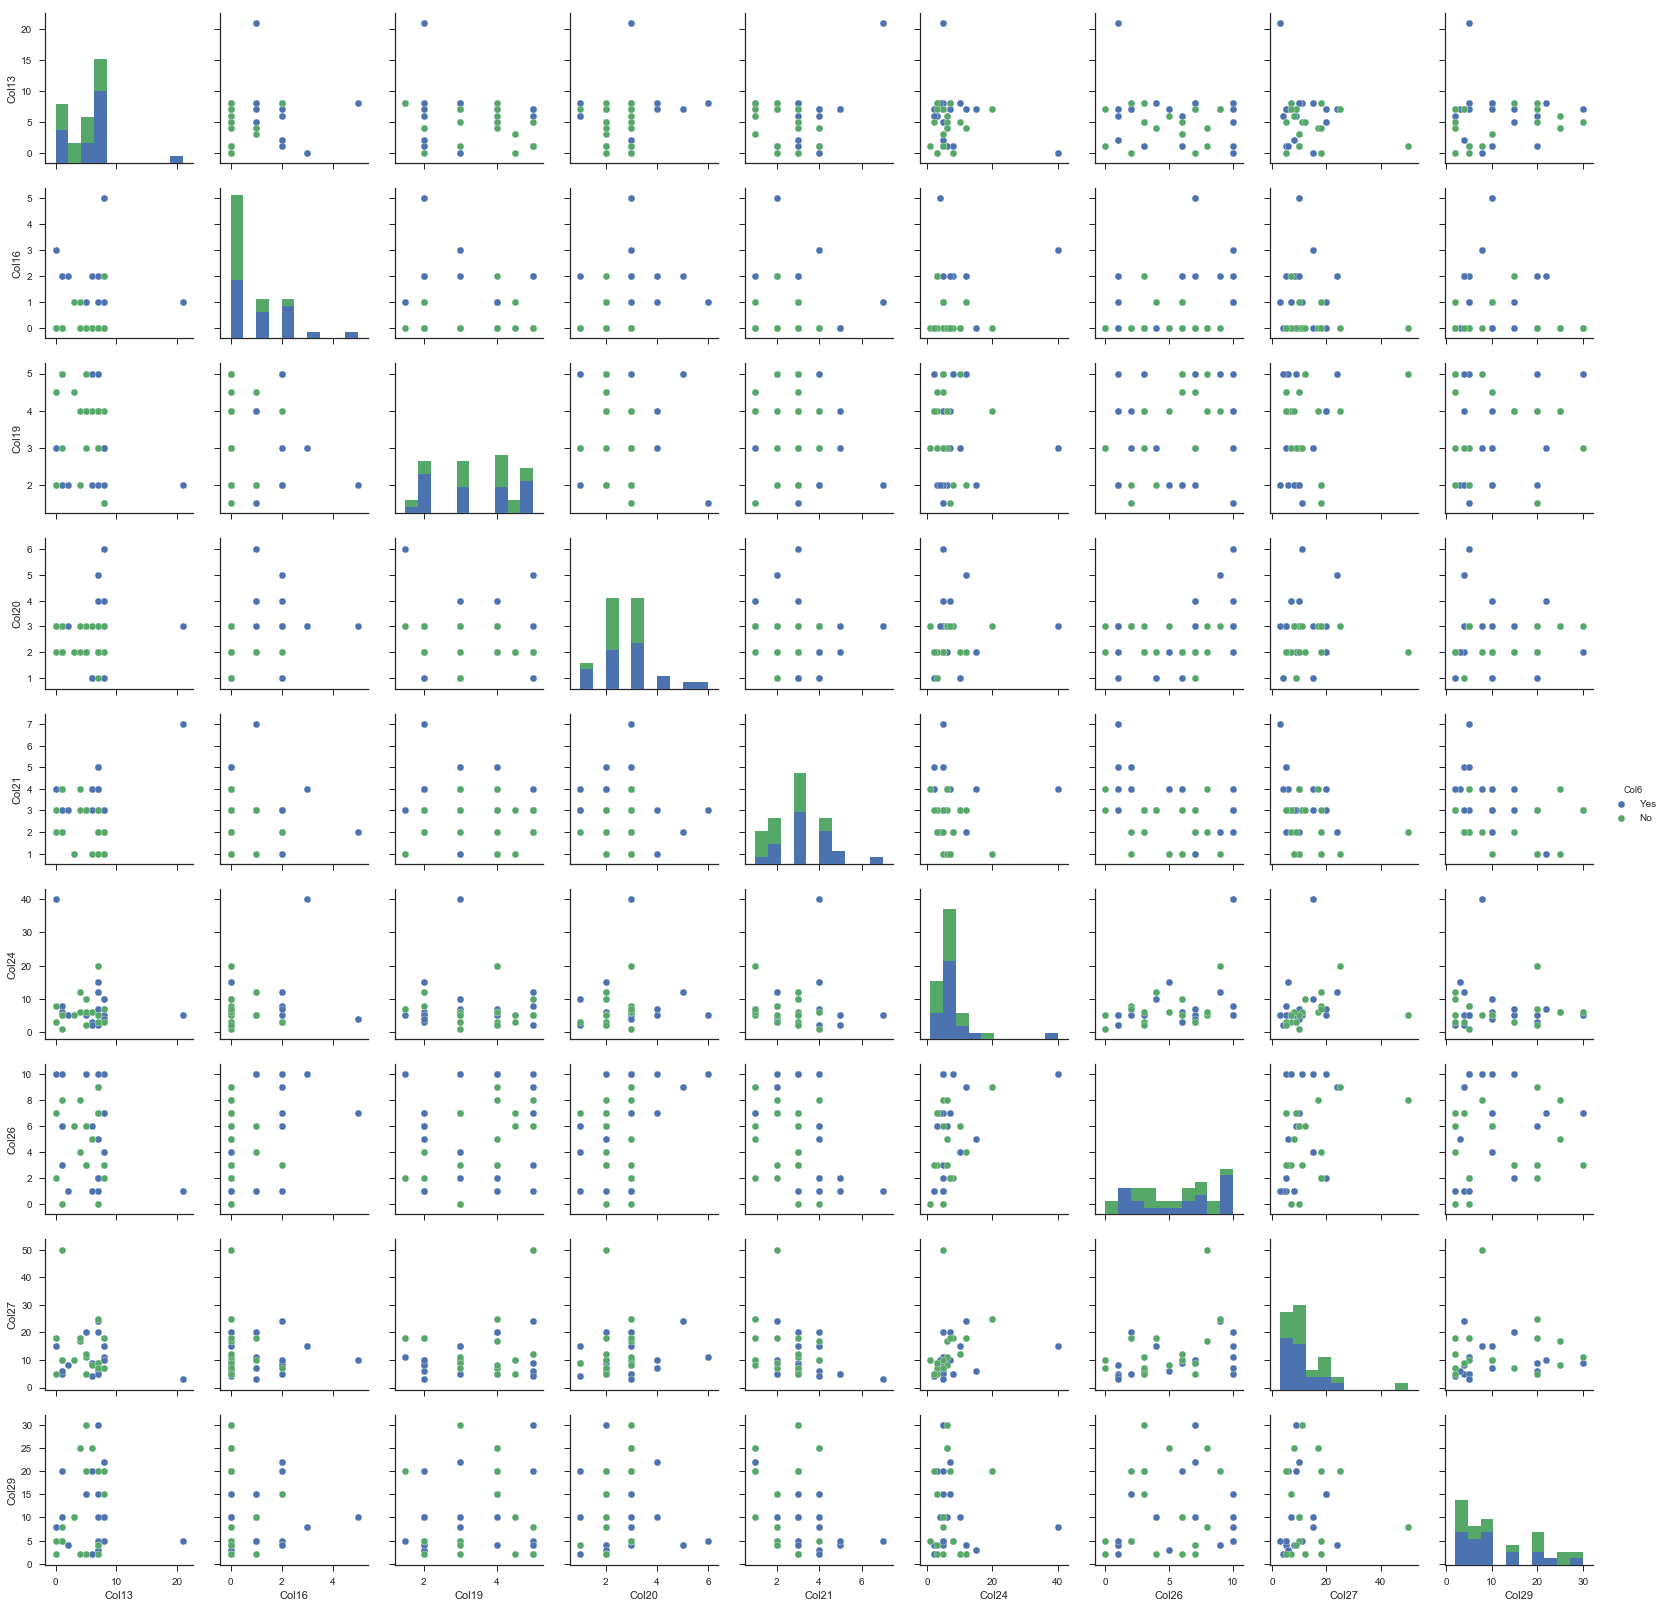

In [78]:
df3 = df2[[list(df2)[5]] + list(df2)[11:31]]
sns.pairplot(df3, hue='Col6')

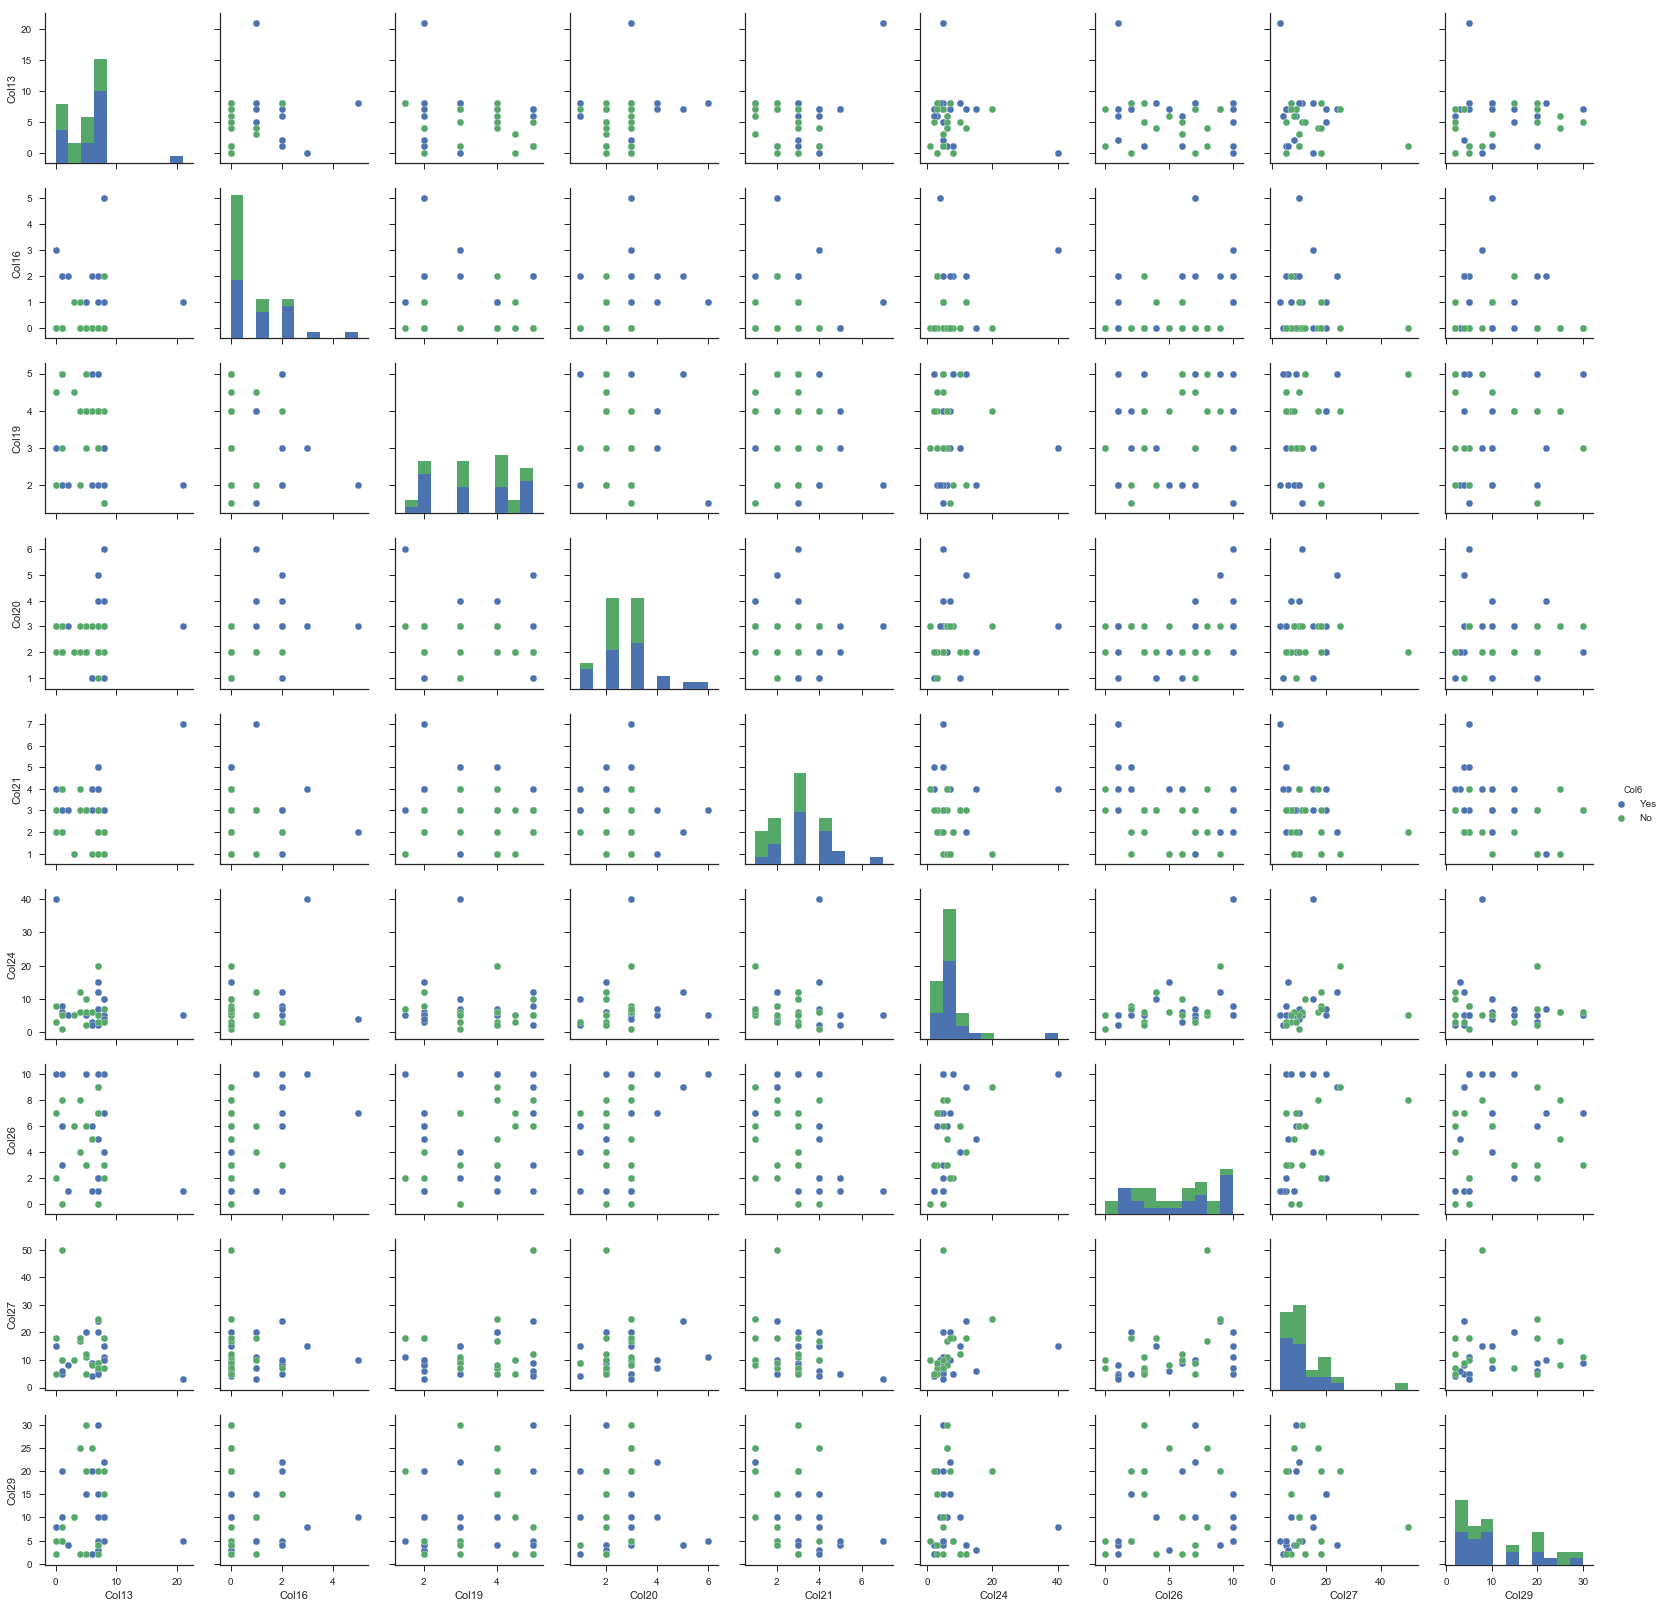

In [79]:
df4 = df2[[list(df2)[5]] + list(df2)[31:]]
sns.pairplot(df3, hue='Col6')

Findings:

The categorical variables are not plotted in this case and visually, we cannot single out significant features that can be used to predict our target variable.

This leads us to creating a kNN classifier having all the features in the dataset.

## Model

Categorical features were converted using one-hot encoding as suggested in lab class through the pandas.get_dummies() function. This is to assign numbers to certain categories.

In [14]:
y = df2['Col6']
X = df2[list(df2)[0:5] + list(df2)[6:]]

XX = pd.get_dummies(X)

training_accuracy = []
test_accuracy = []
training_std = []
test_std = []
neighbors_settings = range(1, 20)
random_states = range(1,100)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    
    train_acc_per_trial = []
    test_acc_per_trial = []
    for random_state in random_states:
        # split training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(XX, y,
                                                    test_size=0.25,
                                                    random_state=random_state)
        # build the model
        clf.fit(X_train, y_train)
        # training set accuracy per trial
        train_acc_per_trial.append(clf.score(X_train, y_train))
        # testing set accuracy per trial
        test_acc_per_trial.append(clf.score(X_test, y_test))
    # record ave training accuracy    
    training_accuracy.append(np.mean(train_acc_per_trial))
    # record ave testing accuracy
    test_accuracy.append(np.mean(test_acc_per_trial))
    # record training std
    training_std.append(np.std(train_acc_per_trial))
    # record testing std
    test_std.append(np.std(test_acc_per_trial))

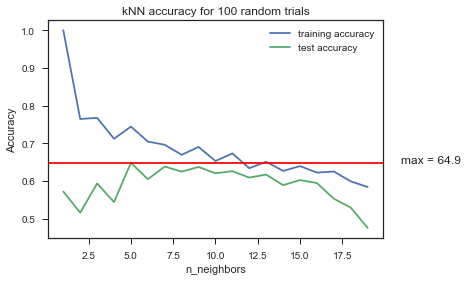

In [130]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("kNN accuracy for 100 random trials")
plt.text(21, np.max(test_accuracy), 'max = {0:.1f}'.format(np.max(test_accuracy)*100))
plt.axhline(np.max(test_accuracy), c = 'red')
plt.legend();

## Conclusion

We now have a kNN classifier with an accuracy of 64.9% test accuracy at 5 nearest neighbors. The test accuracy we got is greater than the Proportion Chance Criterion that we have that is at around 63%, which makes it a good predictor.

We could try out other models to possibly increase the accuracy using more significant features.

### References and Acknowledgement

Monterola, C., K-Nearest Neighbor Classification Notebook

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

Thanks to Patricia Manasan, Joseph Bunao and Titus Jungao for their help in the construction of this notebook.